In [1]:
import os
import bilby
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
import dill

In [2]:
dphi = ["d_phi_0", "d_phi_1", "d_phi_2", "d_phi_3", "d_phi_4", "d_phi_5L", "d_phi_6", "d_phi_6L", "d_phi_7"]
dalpha = ["d_alpha_2", "d_alpha_3", "d_alpha_4"]
dbeta = ["d_beta_2", "d_beta_3"]

dpi = dphi + dalpha + dbeta

In [14]:
def get_run_stats(parentdir, label):
    data = dict(
        hybrid_nest_sampling_time = [],
        hybrid_nest_nlikelihood = [],
        hybrid_pt_sampling_time = [],
        hybrid_pt_nsteps = [],
        hybrid_pt_nlikelihood = [],
        hybrid_pt_ideal_nlikelihood = [],
        hybrid_pt_no_overlap_sampling_time = [],
        hybrid_pt_no_overlap_nsteps = [],
        hybrid_pt_no_overlap_nlikelihood = [],
        hybrid_pt_no_overlap_ideal_nlikelihood = [],
        nest_sampling_time = [],
        nest_nlikelihood   = [],
    )

    hybrid_nest_path = f"{parentdir}/{label}_hybrid/result/{label}_hybrid_data0_0-0_analysis_H1L1_dynesty_result.json"
    hybrid_nest_res = bilby.core.result.read_in_result(hybrid_nest_path)        

    for i,d in tqdm(enumerate(dpi)):
        hybrid_path = f"{parentdir}/{label}_hybrid/result/{label}_hybrid_data0_0-0_analysis_H1L1_dynesty_{d}_result.json"
        hybrid0_path = f"{parentdir}/{label}_hybrid/result/{label}_hybrid_data0_0-0_analysis_H1L1_dynesty_{d}_no-overlap_result.json"
        nest0_path = f"{parentdir}/{label}_{d}_only-dynesty_no-overlap/result/{label}_{d}_only-dynesty_no-overlap_data0_0-0_analysis_H1L1_dynesty_result.json"

        hybrid_resume_path = f"{parentdir}/{label}_hybrid/result/{label}_hybrid_data0_0-0_analysis_H1L1_dynesty_{d}_checkpoint_resume.pickle"
        hybrid0_resume_path = f"{parentdir}/{label}_hybrid/result/{label}_hybrid_data0_0-0_analysis_H1L1_dynesty_{d}_no-overlap_checkpoint_resume.pickle"

        if os.path.isfile(hybrid_path):
            hybrid_res  = bilby.core.result.read_in_result(hybrid_path)
            hybrid0_res = bilby.core.result.read_in_result(hybrid0_path)
            nest0_res  = bilby.core.result.read_in_result(nest0_path)

            with open(hybrid_resume_path, 'rb') as f:
                hybrid_resume = dill.load(f)

            with open(hybrid0_resume_path, 'rb') as f:
                hybrid0_resume = dill.load(f)

            ### hybrid dynesty data
            data["hybrid_nest_sampling_time"].append( hybrid_nest_res.sampling_time )
            data["hybrid_nest_nlikelihood"].append( hybrid_nest_res.num_likelihood_evaluations )

            ### hybrid ptemcee data
            nhybrid_steps = np.argwhere( hybrid_resume["chain_array"][0,:,0] == 0 )[0][0]
            nhybrid_temps   = hybrid_res.sampler_kwargs["ntemps"]
            nhybrid_walkers = hybrid_res.sampler_kwargs["nwalkers"]

            data["hybrid_pt_sampling_time"].append( hybrid_res.sampling_time )
            data["hybrid_pt_nsteps"].append(nhybrid_steps)
            data["hybrid_pt_nlikelihood"].append( 
                nhybrid_temps * nhybrid_walkers * nhybrid_steps
            )
            data["hybrid_pt_ideal_nlikelihood"].append( 
                nhybrid_temps * nhybrid_walkers * 1000
            )

            ### hybrid no overlap ptemcee data
            nhybrid0_steps = np.argwhere( hybrid0_resume["chain_array"][0,:,0] == 0 )[0][0]
            nhybrid0_temps   = hybrid0_res.sampler_kwargs["ntemps"]
            nhybrid0_walkers = hybrid0_res.sampler_kwargs["nwalkers"]

            data["hybrid_pt_no_overlap_sampling_time"].append( hybrid0_res.sampling_time )
            data["hybrid_pt_no_overlap_nsteps"].append(nhybrid_steps)
            data["hybrid_pt_no_overlap_nlikelihood"].append( 
                nhybrid0_temps * nhybrid0_walkers * nhybrid0_steps
            )
            data["hybrid_pt_no_overlap_ideal_nlikelihood"].append( 
                nhybrid_temps * nhybrid_walkers * 1000
            )

            ### dynesty-only data
            data["nest_sampling_time"].append( nest0_res.sampling_time )
            data["nest_nlikelihood"].append( nest0_res.num_likelihood_evaluations )
        else:
            data['hybrid_nest_sampling_time'].append(np.nan)
            data['hybrid_nest_nlikelihood'].append(np.nan)
            data['hybrid_pt_sampling_time'].append(np.nan)
            data['hybrid_pt_nsteps'].append(np.nan)
            data['hybrid_pt_nlikelihood'].append(np.nan)
            data['hybrid_pt_ideal_nlikelihood'].append(np.nan)
            data['hybrid_pt_no_overlap_sampling_time'].append(np.nan)
            data['hybrid_pt_no_overlap_nsteps'].append(np.nan)
            data['hybrid_pt_no_overlap_nlikelihood'].append(np.nan)
            data['hybrid_pt_no_overlap_ideal_nlikelihood'].append(np.nan)
            data['nest_sampling_time'].append(np.nan)
            data['nest_nlikelihood'].append(np.nan)

    return pd.DataFrame(data, index=dpi)

In [15]:
lowsnr_stats = get_run_stats(
    "/home/noah.wolfe/MA499_report_runs/injected/beyond-gr/SNR/beyond-gr_d_phi_2-2E-01_dL-1000",
    "beyond-gr_d_phi_2-2E-01_dL-1000"
)

In [18]:
highsnr_stats = get_run_stats(
    "/home/noah.wolfe/MA499_report_runs/injected/beyond-gr/SNR/beyond-gr_d_phi_2-2E-01_dL-100",
    "beyond-gr_d_phi_2-2E-01_dL-100"
)

In [3]:
lowsnr_stats = pd.read_pickle("./lowsnr_stats.pkl")
highsnr_stats = pd.read_pickle("./highsnr_stats.pkl")

In [4]:
highsnr_stats

,hybrid_nest_sampling_time,hybrid_nest_nlikelihood,hybrid_pt_sampling_time,hybrid_pt_nsteps,hybrid_pt_nlikelihood,hybrid_pt_ideal_nlikelihood,hybrid_pt_no_overlap_sampling_time,hybrid_pt_no_overlap_nsteps,hybrid_pt_no_overlap_nlikelihood,hybrid_pt_no_overlap_ideal_nlikelihood,nest_sampling_time,nest_nlikelihood
d_phi_0,14650.975779,9383121,27477.788659,2281,2851250,1250000,31066.636921,2281,2851250,1250000,5867.474089,7690250
d_phi_1,14650.975779,9383121,35758.297779,2280,2850000,1250000,39532.696611,2280,2851250,1250000,10308.431762,7517630
d_phi_2,14650.975779,9383121,35002.155478,2280,2850000,1250000,10256.757359,2280,2852500,1250000,5886.421876,7813911
d_phi_3,14650.975779,9383121,38765.255267,2280,2850000,1250000,50409.545356,2280,2851250,1250000,10776.685897,7929974
d_phi_4,14650.975779,9383121,40826.629434,2280,2850000,1250000,11603.424487,2280,2852500,1250000,6264.486070,7729108
d_phi_5L,14650.975779,9383121,13732.803902,2281,2851250,1250000,46841.125887,2281,2851250,1250000,6686.469731,8086524
d_phi_6,14650.975779,9383121,36556.355764,2280,2850000,1250000,13064.596733,2280,2852500,1250000,6722.763997,8161719
d_phi_6L,14650.975779,9383121,34315.765060,2280,2850000,1250000,56023.541178,2280,2851250,1250000,6168.682580,7801460
d_phi_7,14650.975779,9383121,37413.610780,2280,2850000,1250000,40265.422642,2280,2851250,1250000,6848.495779,8606379
d_alpha_2,14650.975779,9383121,45362.869504,2291,2863750,1250000,40638.085584,2291,2867500,1250000,14684.548387,10316359


In [20]:
np.nanmin(lowsnr_stats["nest_nlikelihood"].values)

3331562.0

# "Break-even" Plots

In [44]:
lowsnr_stats

,hybrid_nest_sampling_time,hybrid_nest_nlikelihood,hybrid_pt_sampling_time,hybrid_pt_nsteps,hybrid_pt_nlikelihood,hybrid_pt_ideal_nlikelihood,hybrid_pt_no_overlap_sampling_time,hybrid_pt_no_overlap_nsteps,hybrid_pt_no_overlap_nlikelihood,hybrid_pt_no_overlap_ideal_nlikelihood,nest_sampling_time,nest_nlikelihood
d_phi_0,7338.209798,3369128.0,29468.377288,2280.0,2850000.0,1250000.0,40444.038246,2280.0,2851250.0,1250000.0,11477.129124,3678751.0
d_phi_1,7338.209798,3369128.0,31026.263248,2280.0,2850000.0,1250000.0,24001.603505,2280.0,2852500.0,1250000.0,6526.901560,3415216.0
d_phi_2,7338.209798,3369128.0,44238.330908,2280.0,2850000.0,1250000.0,24336.974269,2280.0,2851250.0,1250000.0,9375.759197,3675135.0
d_phi_3,7338.209798,3369128.0,39707.147110,2280.0,2850000.0,1250000.0,19914.032786,2280.0,2852500.0,1250000.0,5582.481513,3660202.0
d_phi_4,7338.209798,3369128.0,41423.955439,2280.0,2850000.0,1250000.0,10584.198805,2280.0,2852500.0,1250000.0,9320.350251,3331562.0
d_phi_5L,7338.209798,3369128.0,30540.960311,2280.0,2850000.0,1250000.0,12576.170097,2280.0,2852500.0,1250000.0,3047.420157,3514910.0
d_phi_6,7338.209798,3369128.0,38218.335172,2280.0,2850000.0,1250000.0,29629.000945,2280.0,2851250.0,1250000.0,3103.091127,3392887.0
d_phi_6L,7338.209798,3369128.0,35845.686494,2280.0,2850000.0,1250000.0,19020.173160,2280.0,2852500.0,1250000.0,2893.529674,3353090.0
d_phi_7,7338.209798,3369128.0,25855.814916,2281.0,2851250.0,1250000.0,12020.289293,2281.0,2852500.0,1250000.0,11053.243063,3540414.0
d_alpha_2,7338.209798,3369128.0,41110.108506,2280.0,2850000.0,1250000.0,6604.679224,2280.0,2852500.0,1250000.0,3309.216166,3855082.0


Text(0.5, 1.0, 'Low-SNR Computational Cost')

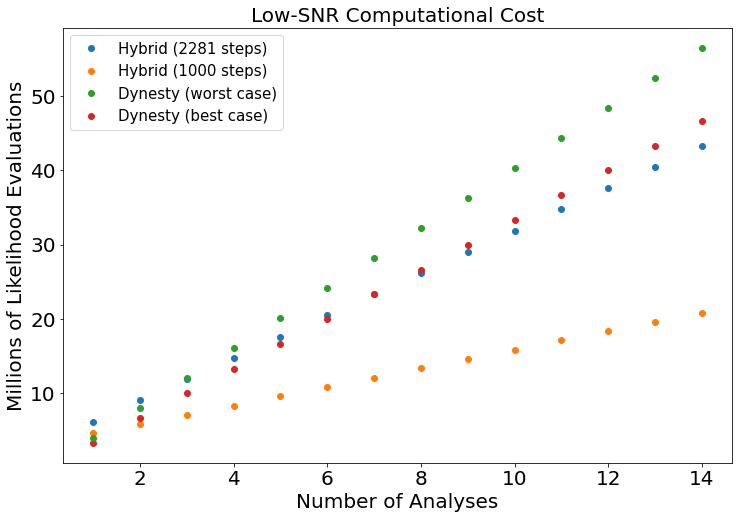

In [32]:
fig, ax = plt.subplots(figsize=(12,8))

for i,d in enumerate(dpi):
    hybrid_cost = lowsnr_stats["hybrid_nest_nlikelihood"].values[0] + np.nanmax(lowsnr_stats["hybrid_pt_nlikelihood"]) * (i + 1)
    hybrid_ideal_cost = lowsnr_stats["hybrid_nest_nlikelihood"].values[0] + np.nanmax(lowsnr_stats["hybrid_pt_ideal_nlikelihood"].values) * (i + 1)
    nest_best_cost   = np.nanmin(lowsnr_stats["nest_nlikelihood"].values) * (i + 1)
    nest_worst_cost   = np.nanmax(lowsnr_stats["nest_nlikelihood"].values) * (i + 1)

    ax.scatter( i + 1, hybrid_cost / 1E6 , c="C0" )
    ax.scatter( i + 1, hybrid_ideal_cost / 1E6, c="C1")
    ax.scatter( i + 1, nest_best_cost / 1E6, c="C3")
    ax.scatter( i + 1, nest_worst_cost / 1E6, c="C2")

ax.tick_params(labelsize=20)
ax.set_xlabel("Number of Analyses", fontsize=20)
ax.set_ylabel("Millions of Likelihood Evaluations", fontsize=20)

ax.legend(
    [ mpl.lines.Line2D([],[],linestyle="",marker="o",c="C0"), mpl.lines.Line2D([],[],linestyle="",marker="o",c="C1"), mpl.lines.Line2D([],[],linestyle="",marker="o",c="C2"), mpl.lines.Line2D([],[],linestyle="",marker="o",c="C3") ],
    [ "Hybrid (2281 steps)", "Hybrid (1000 steps)", "Dynesty (worst case)", "Dynesty (best case)" ],
    prop=dict(size=15)
)

ax.set_title("Low-SNR Computational Cost", fontsize=20)

Text(0.5, 1.0, 'High-SNR Computational Cost')

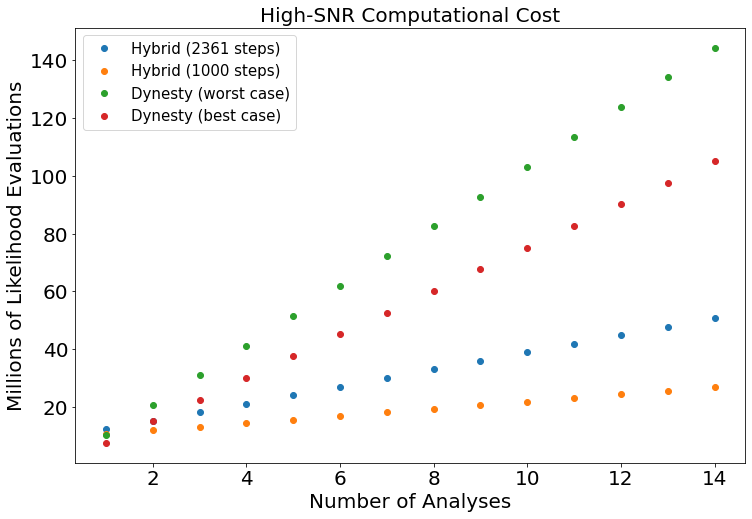

In [48]:
fig, ax = plt.subplots(figsize=(12,8))

for i,d in enumerate(dpi):
    hybrid_cost = highsnr_stats["hybrid_nest_nlikelihood"].values[0] + np.nanmax(highsnr_stats["hybrid_pt_nlikelihood"]) * (i + 1)
    hybrid_ideal_cost = highsnr_stats["hybrid_nest_nlikelihood"].values[0] + np.nanmax(highsnr_stats["hybrid_pt_ideal_nlikelihood"].values) * (i + 1)
    nest_best_cost   = np.nanmin(highsnr_stats["nest_nlikelihood"].values) * (i + 1)
    nest_worst_cost   = np.nanmax(highsnr_stats["nest_nlikelihood"].values) * (i + 1)

    ax.scatter( i + 1, hybrid_cost / 1E6 , c="C0" )
    ax.scatter( i + 1, hybrid_ideal_cost / 1E6, c="C1")
    ax.scatter( i + 1, nest_best_cost / 1E6, c="C3")
    ax.scatter( i + 1, nest_worst_cost / 1E6, c="C2")

ax.tick_params(labelsize=20)
ax.set_xlabel("Number of Analyses", fontsize=20)
ax.set_ylabel("Millions of Likelihood Evaluations", fontsize=20)

ax.legend(
    [ mpl.lines.Line2D([],[],linestyle="",marker="o",c="C0"), mpl.lines.Line2D([],[],linestyle="",marker="o",c="C1"), mpl.lines.Line2D([],[],linestyle="",marker="o",c="C2"), mpl.lines.Line2D([],[],linestyle="",marker="o",c="C3") ],
    [ "Hybrid (2361 steps)", "Hybrid (1000 steps)", "Dynesty (worst case)", "Dynesty (best case)" ],
    prop=dict(size=15)
)

ax.set_title("High-SNR Computational Cost", fontsize=20)

# Extracting GW150914 cost

In [5]:
def load_hybrid_data(rundir, result_prefix, dpi, extra_label=None):
    resultdir = os.path.join(rundir, "result")

    if extra_label is None:
        result_path = os.path.join(resultdir, "%s_%s_result.json" % (result_prefix, dpi))
        resume_path = os.path.join(resultdir, "%s_%s_checkpoint_resume.pickle" % (result_prefix, dpi))
    else:
        result_path = os.path.join(resultdir, "%s_%s_%s_result.json" % (result_prefix, dpi, extra_label))
        resume_path = os.path.join(resultdir, "%s_%s_%s_checkpoint_resume.pickle" % (result_prefix, dpi, extra_label))
    
    result = bilby.core.result.read_in_result(result_path) if os.path.isfile(result_path) else None
    
    with open(resume_path, 'rb') as f:
        resume = dill.load(f)
        
    return result, resume

gw150914_rundir = "/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/"
gw150914_prefix =  "hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty"

In [6]:
hybrid_nest_nlikelihood = np.nan

hybrid_pt_nlikelihood = np.zeros(len(dpi))
hybrid_pt_ideal_nlikelihood = np.zeros(len(dpi))
hybrid_pt_nsteps = np.zeros(len(dpi))

for i, d in tqdm(enumerate(dpi)):
    _, gw_hybrid0_resume = load_hybrid_data(
        gw150914_rundir, 
        gw150914_prefix,
        d,
        extra_label="no-overlap"
    )

    print(d)

    ntemps = 5
    nwalkers = 250
    nsteps = np.argwhere( gw_hybrid0_resume["chain_array"][0,:,0] == 0 )[0][0]

    hybrid_pt_nsteps[i] = nsteps
    hybrid_pt_nlikelihood[i] = ntemps * nwalkers * nsteps
    hybrid_pt_ideal_nlikelihood[i] = ntemps * nwalkers * 1000


d_phi_0
d_phi_1
d_phi_2
d_phi_3
d_phi_4
d_phi_5L
d_phi_6
d_phi_6L
d_phi_7
d_alpha_2
d_alpha_3
d_alpha_4
d_beta_2
d_beta_3



In [42]:
hybrid_nest_res = bilby.core.result.read_in_result("/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/result/hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty_result.json")

In [43]:
print("hybrid_nest_nlikelihood:", hybrid_nest_res.num_likelihood_evaluations)

hybrid_nest_nlikelihood: 23222664


In [7]:
hybrid_pt_nlikelihood

array([2955000., 2952500., 2952500., 2952500., 2911250., 2951250.,
       2953750., 2951250., 2490000., 2951250., 2952500., 2951250.,
       2951250., 2952500.])

In [41]:
hybrid_nest_nlikelihood

nan

# OLD PLOTS

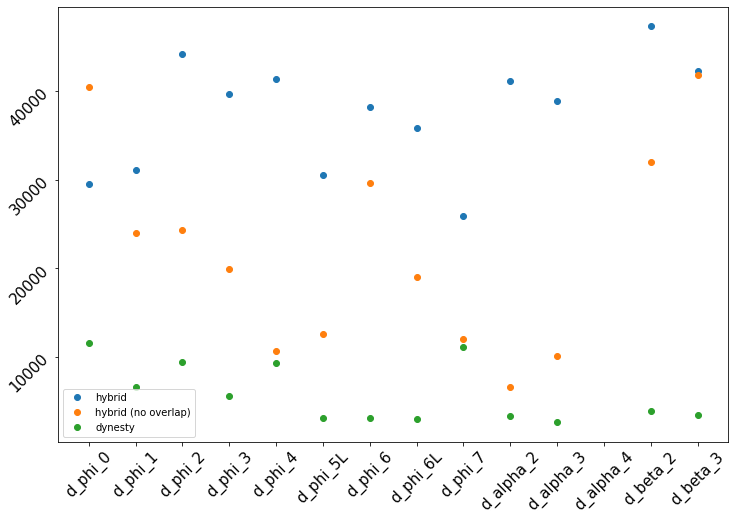

In [52]:
fig, ax  = plt.subplots(figsize=(12,8))

ax.plot(
    lowsnr_stats["hybrid_sampling_time"], linestyle="", marker="o", label="hybrid"
)

ax.plot(
    lowsnr_stats["hybrid_no_overlap_sampling_time"], linestyle="", marker="o", label="hybrid (no overlap)"
)

ax.plot(
    lowsnr_stats["nest_sampling_time"], linestyle="", marker="o", label="dynesty"
)

plt.legend()

ax.tick_params(rotation=45, labelsize=15)

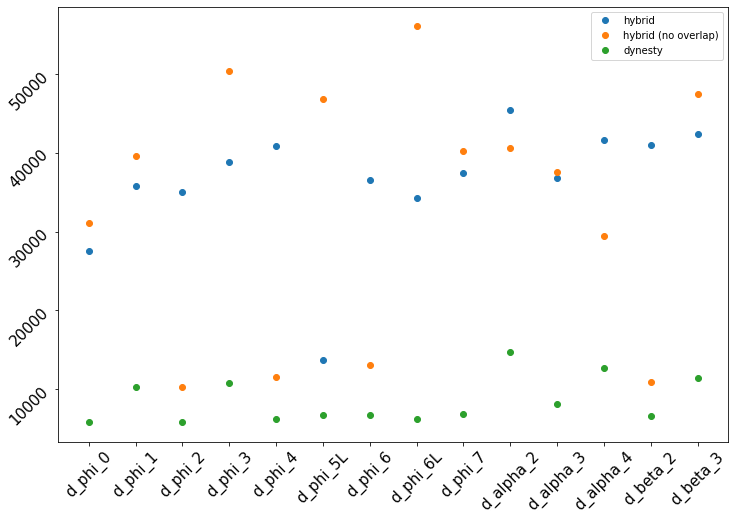

In [53]:
fig, ax  = plt.subplots(figsize=(12,8))

ax.plot(
    highsnr_stats["hybrid_sampling_time"], linestyle="", marker="o", label="hybrid"
)

ax.plot(
    highsnr_stats["hybrid_no_overlap_sampling_time"], linestyle="", marker="o", label="hybrid (no overlap)"
)

ax.plot(
    highsnr_stats["nest_sampling_time"], linestyle="", marker="o", label="dynesty"
)

plt.legend()

ax.tick_params(rotation=45, labelsize=15)